In [7]:
import matplotlib.pyplot as plt
import matplotlib
import mpld3
import numpy as np
import pandas as pd
from sympy import Eq, Symbol, solve

%matplotlib inline

In [94]:
import astropy.units as u
from astropy.constants import G, c, M_jup, M_sun, m_e, k_B, h, N_A, m_p, hbar, eps0, sigma_sb, e, mu0

In [10]:
#number 1
u.u.to(u.MeV/c**2)
dm1=(4*1.007825-4.0026032)*931.5
dm1

26.73106919999966

In [11]:
dm2=(14*4.0026032-55.9349421)*931.5
dm2

94.5497650500043

In [18]:
1+1/14.*dm2/dm1

1.2526481300055503

In [12]:
#number 3
def f(x):
    return (x*(2.*x**2-3.)*np.sqrt(x**2+1))+3*np.arcsinh(x)

@u.quantity_input(p=u.kg*u.m/u.s)
def x(p):
    return float(p/(m_e*c))

@u.quantity_input(rho=u.g/u.cm**3)
def p_f(rho):
    return ((3*h**3*rho/(8*np.pi*m_p))**(1/3.)).to(u.kg*u.m/u.s)

In [13]:
(np.pi*m_e**4*c**5/(3*h**3)).decompose().to(u.N/u.m**2)

<Quantity 6.002331675734661e+21 N / m2>

In [128]:
f(x(p_f(1*u.g/u.cm**3)))

1.6518679479826659e-10

In [38]:
rhos=np.logspace(0,15,15)*u.g/u.cm**3
mu_e=0.5

In [53]:
P=(np.pi*m_e**4*c**5/(3.*h**3)).to(u.N/u.m**2)*[f(x(p_f(i))) for i in rhos]

K_nr=(3./np.pi)**(2./3)*(h**2)/(20*m_e*m_p**(5./3)*mu_e**(5./3))
K_ur=(3./np.pi)**(4./3)*h*c/(8*m_p**(4./3)*mu_e**(4./3))

31479490.7908 m4 / (kg(2/3) s2)
29634086788.9 m3 / (kg(1/3) s2)


In [57]:
(K_nr*(1*u.g/u.cm**3)**(5./3)).decompose().to(1.*u.N/u.m**2)
(K_ur*(1*u.g/u.cm**3)**(4./3)).decompose().to(1.*u.N/u.m**2)

<Quantity 296340867888867.4 N / m2>

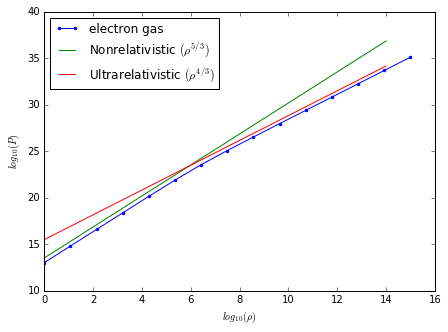

In [174]:
plt.subplots(figsize=(7,5))
plt.plot(np.log10(rhos/(1.*u.g/u.cm**3)), np.log10(P/(1.*u.g/(u.cm*u.s**2))),'.-',label='electron gas')
z=np.arange(0,15)
plt.plot(z, np.log10(K_nr/(1.*u.cm**4/(u.g**(2./3)*u.s**2)))+5/3.*z, label='Nonrelativistic '+r'$(\rho^{5/3})$')
plt.plot(z, np.log10(K_ur/(1.*u.cm**3/(u.g**(1./3)*u.s**2)))+4/3.*z, label='Ultrarelativistic '+r'$(\rho^{4/3})$')
plt.legend(loc='best')
plt.xlabel(r"$log_{10}(\rho)$")
plt.ylabel(r"$log_{10}(P)$")

In [62]:
(1.*u.N/u.m**2).decompose()

<Quantity 1.0 kg / (m s2)>

In [102]:
# number 5
((26.73*u.MeV*0.1*85*u.solMass/m_p*0.25)/((10**6.006)*1*u.solLum)).decompose().to(u.Myr)

<Quantity 0.8794555454558517 Myr>

In [106]:
((26.73*u.MeV*0.072*u.solMass/m_p*0.25)/((10**-4.3)*1*u.solLum)).decompose().to(u.Gyr)

<Quantity 150704.9309860643 Gyr>

In [145]:
a=((10**6.006*u.solLum/(sigma_sb*((10**4.705)*u.K)**4*4*np.pi))**0.5).decompose()
a.to(u.m)
#a.to(u.solRad)

<Quantity 9101100161.04924 m>

In [146]:
a=(((10**-4.3)*u.solLum/(sigma_sb*((10**3.23)*u.K)**4*4*np.pi))**0.5).decompose()
a.to(u.m)
#a.to(u.solRad)

<Quantity 57028755.446850814 m>

In [124]:
(4*np.pi*G*m_p*c*85*u.solMass/(6.65e-25*u.cm**2)).decompose().to(u.solLum)

<Quantity 2780025.133551262 solLum>

In [1]:
#number 4
n=[1,1.5,2,3,3.5]
z1=[3.14159,3.6536,4.35287,6.89684,9.4001]
dzdx1=[-0.318311,-0.203319,-0.127249,-0.0424299,-0.0213961]

In [4]:
for i, ni in enumerate(n):
    print 1./(ni+1.)*1./(z1[i]**4./3)*1./(dzdx1[i]**2./3)
    

0.455943676034
0.488722773049
0.516071303626
0.55237993946
0.559539644681


In [72]:
(((22.53*u.s/u.m**2)/(1.42e22*u.cm)/(1.5e-24*u.s*u.cm**2))).decompose()

<Quantity 1057746478.8732394 1 / m5>

In [100]:
(q_e**2/(2*np.pi*c**3*m_e)).decompose()

<Quantity 1.664156204284091e-34 A2 s5 / (kg m3)>

In [88]:
q_e=1.602e-19*u.C
q_e

<Quantity 1.602e-19 C>

In [99]:
(((4e-9*u.T)/(25*u.km/u.s))**2/mu0).decompose()

<Quantity 2.0371832715762606e-20 kg / m3>

In [105]:
(26.73*u.MeV/(4*m_p*c**2)*0.072*u.solMass*c**2/(10**(-4.3)*u.solLum)).decompose()

<Quantity 4.755885930085823e+21 s>

In [106]:
46/0.29

158.6206896551724

In [109]:
(6.65e-25*u.cm**2/m_p).decompose().to(u.cm**2/u.g)

<Quantity 0.39757942240399274 cm2 / g>

In [115]:
(4*np.pi*G*85*u.solMass*c/(0.4*u.cm**2/u.g)).to(u.solLum)

<Quantity 2763201.9671647334 solLum>

In [116]:
10**6.006/_

<Quantity 0.3669335060502415 1 / solLum>

In [120]:
(4*np.pi*c*G*0.072*u.solMass/(0.01*u.cm**2/u.g)).to(u.W)

<Quantity 3.600770744148332e+31 W>

In [138]:
((sigma_sb*((10**3.23)*u.K)**4)).to(u.kW/u.m**2)

<Quantity 471.6410830038765 kW / m2>

In [132]:
(10**4.705)*u.K

<Quantity 50699.070827470445 K>

In [133]:
(10**3.23)*u.K

<Quantity 1698.2436524617442 K>

In [140]:
(10**-4.3)**0.5*(5777/10**3.23)**2

0.08192279012595609

In [147]:
13.086/0.082

159.58536585365854

In [155]:
print "$\{rho}$"

$\{rho}$


In [179]:
(((62.3-422.75)*1e-3*u.s)/((0.0324-0.0484)*u.m**2)).to(u.s/u.cm**2)

<Quantity 0.0022528125 s / cm2>

In [183]:
((2.253e-3*u.s/u.cm**2)/(4.6*u.kpc)/(1.5e-24*u.s)).to(1/u.cm**3)

<Quantity 0.10581848897355596 1 / cm3>

In [204]:
K=1./(8.*np.pi**2*c**3)*(q_e**3/eps0/m_e**2)
K.decompose()

<Quantity 2.6303227922002804e-13 A s2 / kg>

In [205]:
B=(3e-3*u.cm**-2)/(0.02*u.cm**-3*6500*u.lyr*K)
B.decompose()

<Quantity 9.273510844889598e-11 kg / (A s2)>

In [206]:
(u.Tesla).decompose()

Unit("kg / (A s2)")

In [208]:
B.to(u.Gauss)

<Quantity 9.273510844889597e-07 G>